<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/Fundamental_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

17:01:33 Starting...
17:01:33 Installing yfinance into Google notebook...
17:01:43 Installing arch into Google notebook...
17:01:56 Initialized.


In [6]:
from requests import get
from io import StringIO
ics=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/ics.csv").text.split("\n")[5:])))\
    .set_index('Ticker').rename(columns={"Sharpe Ratio":("Expected","Sharpe"),"Sharpe Std.Err":("Expected","Std.Err.")})
ics.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,""),ics.columns))
ics["Significance"]=ics["Significance"].apply(lambda x:"" if isinstance(x,float) else x)
nprint("Loaded IC data.")
display(ics)

17:03:19 Loaded IC data.


IC Sample  Std.Error t Statistic   p Value  Expected            \
                                                             Sharpe  Std.Err.   
Ticker                                                                          
TLT     16.268635    246   6.415003    2.536029  0.005606  2.582566  1.012122   
TBT     15.175845    246   6.415003    2.365680  0.008998  2.409091  1.012122   
TBX     14.299231    183   7.453560    1.918443  0.027527  2.269933  1.173477   
TLH     13.550212     89  10.783277    1.256595  0.104450  2.151030  1.682694   
PST     12.703511    183   7.453560    1.704355  0.044157  2.016620  1.173477   
IEF     11.305617    218   6.819943    1.657729  0.048686  1.794711  1.075157   
BND      9.784960    195   7.216878    1.355844  0.087574  1.553314  1.136797   
IEI      8.136216    218   6.819943    1.193004  0.116434  1.291584  1.075157   
GLD     -0.066833    234   6.579517   -0.010158  0.504052 -0.010609  1.037749   
DIA     -1.561440    246   6.415003   -0.243404  0.596154 -0.247871  1.012122   
UUP     -1.681645    228   6.666667   -0.252247  0.599575 -0.266953  1.051315   
TQQQ    -2.428054    246   6.415003   -0.378496  0.647469 -0.385442  1.012122   
QQQ     -2.689838    246   6.415003   -0.419304  0.662503 -0.426998  1.012122   
UDOW    -2.691859    246   6.415003   -0.419619  0.662618 -0.427319  1.012122   
SPY     -3.216365    246   6.415003   -0.501382  0.691949 -0.510582  1.012122   
IWM     -3.410643    235   6.565322   -0.519494  0.698292 -0.541423  1.035539   
RWM     -3.673806    235   6.565322   -0.559577  0.712116 -0.583199  1.035539   
SH      -3.822143    246   6.415003   -0.595813  0.724350 -0.606746  1.012122   
SPXL    -4.042200    246   6.415003   -0.630117  0.735691 -0.641679  1.012122   
DOG     -4.922934    246   6.415003   -0.767409  0.778581 -0.781491  1.012122   
UDN     -6.967164    224   6.726728   -1.035743  0.849839 -1.106003  1.060660   

             First        Last Significance  
                                             
Ticker                                       
TLT     2023-01-30  2024-01-22           **  
TBT     2023-01-30  2024-01-22           **  
TBX     2023-05-01  2024-01-22            *  
TLH     2023-09-14  2024-01-22               
PST     2023-05-01  2024-01-22            *  
IEF     2023-03-10  2024-01-22            *  
BND     2023-04-13  2024-01-22               
IEI     2023-03-10  2024-01-22               
GLD     2023-02-15  2024-01-22               
DIA     2023-01-30  2024-01-22               
UUP     2023-02-24  2024-01-22               
TQQQ    2023-01-30  2024-01-22               
QQQ     2023-01-30  2024-01-22               
UDOW    2023-01-30  2024-01-22               
SPY     2023-01-30  2024-01-22               
IWM     2023-02-14  2024-01-22               
RWM     2023-02-14  2024-01-22               
SH      2023-01-30  2024-01-22               
SPXL    2023-01-30  2024-01-22               
DOG     2023-01-30  2024-01-22               
UDN     2023-02-24  2024-01-22

In [7]:
srs=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/sharpes.csv").text.split("\n")[2:])))\
    .rename(columns={"Unnamed: 0":"Ticker","Sharpe":("Actual","Sharpe"),"Std.Err.":("Actual","Std.Err.")}).set_index("Ticker")
srs.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,""),srs.columns))
srs["Significance"]=srs["Significance"].apply(lambda x:'' if isinstance(x,float) else x)
nprint("Loaded Sharpe Ratio data.")
display(srs)

17:04:36 Loaded Sharpe Ratio data.


Mean  Std.Dev. Sample    Kurtosis   t Score   p Value  Annualized  \
                                                                                
Ticker                                                                          
TBX     0.035347  0.260193    248    9.891555  2.139384  0.016693    9.314604   
QQQ     0.139596  1.085913    248    2.881244  2.024439  0.022001   42.125077   
TQQQ    0.307369  2.754289    248    3.615918  1.757425  0.040042  116.708457   
Total   0.085026  0.765651    248    4.165812  1.748832  0.040781   23.883973   
TBT     0.109850  1.061252    248   16.191815  1.630078  0.052180   31.873217   
SPY     0.072187  0.764841    248    2.934494  1.486319  0.069235   19.942821   
TLH     0.032203  0.481407    248    9.353862  1.053442  0.146584    8.452124   
DIA     0.044886  0.680054    248    3.230114  1.039422  0.149813   11.972935   
SPXL    0.153706  2.338520    248    2.770902  1.035086  0.150821   47.261887   
DOG     0.002378  0.037449    248  251.000000  1.000000  0.159145    0.601052   
PST     0.022108  0.406163    248   15.140757  0.857184  0.196087    5.728672   
GLD     0.032165  0.759644    248    4.947248  0.666801  0.252761    8.441669   
UUP     0.013460  0.318774    248    6.907002  0.664948  0.253352    3.449868   
UDOW    0.075059  2.044671    248    3.192551  0.578105  0.281860   20.813589   
BND     0.011225  0.333439    248    5.123893  0.530132  0.298248    2.868847   
IEI     0.008130  0.255522    248    5.612638  0.501042  0.308394    2.069738   
TLT     0.021527  0.934695    248    3.929564  0.362698  0.358570    5.574099   
IWM     0.018677  1.135457    248    5.157030  0.259037  0.397911    4.818654   
IEF    -0.006746  0.425817    248    4.559400 -0.249506  0.598412   -1.685803   
RWM    -0.006515  0.367749    248   32.918552 -0.279004  0.609762   -1.628509   
SH     -0.002928  0.105011    248   91.168828 -0.439169  0.669538   -0.735270   
UDN    -0.004785  0.153126    248   10.348246 -0.492132  0.688469   -1.198667   

          Actual           Significance  
          Sharpe  Std.Err.               
Ticker                                   
TBX     2.156568  3.394267            *  
QQQ     2.040700  1.733871            *  
TQQQ    1.771542  1.761152            *  
Total   1.762879  1.874949            *  
TBT     1.643171  3.381722               
SPY     1.498258  1.455770               
TLH     1.061903  1.846388               
DIA     1.047770  1.279871               
SPXL    1.043400  1.227147               
DOG     1.008032  8.096204               
PST     0.864069  1.923051               
GLD     0.672157  1.212088               
UUP     0.670289  1.300122               
UDOW    0.582749  1.097851               
BND     0.534391  1.146864               
IEI     0.505067  1.146750               
TLT     0.365611  1.056223               
IWM     0.261117  1.043135               
IEF    -0.251510  1.036015               
RWM    -0.281245  1.287434               
SH     -0.442696  2.346317               
UDN    -0.496085  1.265132

In [8]:
from statsmodels.api import add_constant
from statsmodels.regression.linear_model import OLS

ics[list(map(lambda x:("Actual",x),srs["Actual"].columns))]=srs["Actual"]
data=ics.xs("Sharpe",axis=1,level=1)
display(data)
model=OLS(data["Actual"],add_constant(data["Expected"])).fit()
nprint("Naive Regression Analysis\n",model.summary())

,Expected,Actual
Ticker,,
TLT,2.582566,0.365611
TBT,2.409091,1.643171
TBX,2.269933,2.156568
TLH,2.151030,1.061903
PST,2.016620,0.864069
IEF,1.794711,-0.251510
BND,1.553314,0.534391
IEI,1.291584,0.505067
GLD,-0.010609,0.672157


17:04:43 Naive Regression Analysis
                             OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.7293
Date:                Tue, 23 Jan 2024   Prob (F-statistic):              0.404
Time:                        17:04:43   Log-Likelihood:                -23.492
No. Observations:                  21   AIC:                             50.98
Df Residuals:                      19   BIC:                             53.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

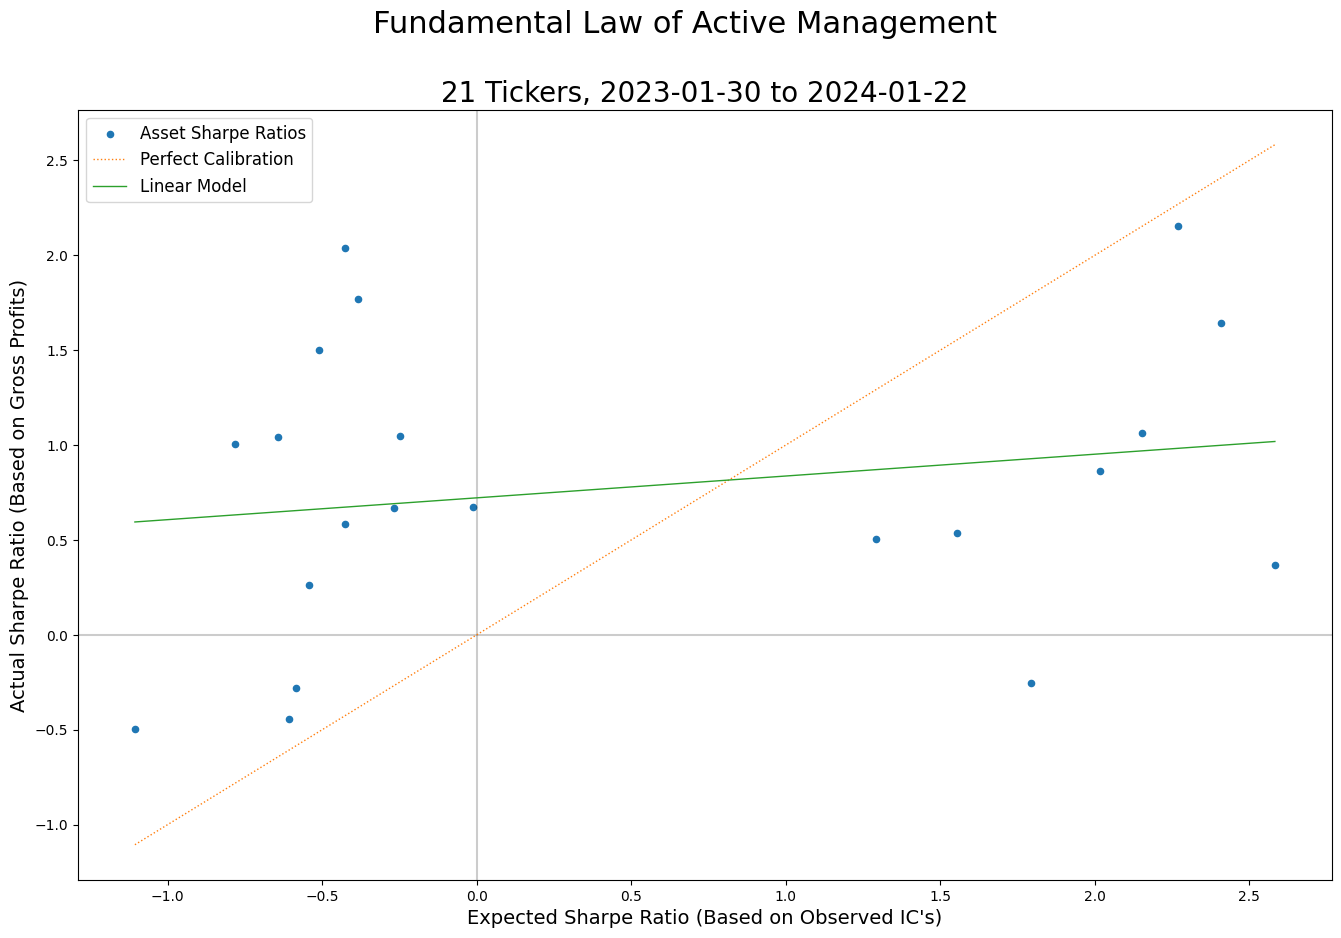

In [9]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
data.plot.scatter("Expected","Actual",ax=plot,label="Asset Sharpe Ratios",color='C0')
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
x=[data["Expected"].min(),data["Expected"].max()]
y=list(map(lambda x:model.params[0]+model.params[1]*x,x))
plot.plot(x,x,':',label="Perfect Calibration",color='C1',linewidth=1)
plot.plot(x,y,'-',label="Linear Model",color='C2',linewidth=1)
plot.legend(fontsize=12)
plot.set_xlabel(plot.get_xlabel()+" Sharpe Ratio (Based on Observed IC's)",fontsize=14)
plot.set_ylabel(plot.get_ylabel()+" Sharpe Ratio (Based on Gross Profits)",fontsize=14)
title="Fundamental Law of Active Management"
figure.suptitle(title,fontsize=22)
plot.set_title("%d Tickers, %s to %s" % (data.shape[0],ics["First"].min(),ics["Last"].max()),fontsize=20)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')